<a href="https://colab.research.google.com/github/shovagelal/Open-source-Practice/blob/main/Inspection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

First few rows of the dataset:
   Unnamed: 0  inspection_id           created_at deleted_at  impression  \
0           1              2  2019-02-21 18:26:00        NaN         NaN   
1           2              2  2019-02-21 18:26:00        NaN         NaN   
2           3              2  2019-02-21 18:26:00        NaN         NaN   
3           4              2  2019-02-21 18:26:00        NaN         NaN   
4           5              2  2019-02-21 18:26:00        NaN         NaN   

   attention  category_id value          category_type hive_type  \
0        0.0          494     0        Number positive  long_box   
1        0.0          495     0  Boolean (yes = green)  long_box   
2        0.0          497     1  Boolean (yes = green)  long_box   
3        0.0          595     1  Boolean (yes = green)  long_box   
4        0.0          774     5        Number positive  long_box   

           translation  hive_id  key  coordinate_lat  coordinate_lon  
0  Anzahl der Rähmchen      4.0 

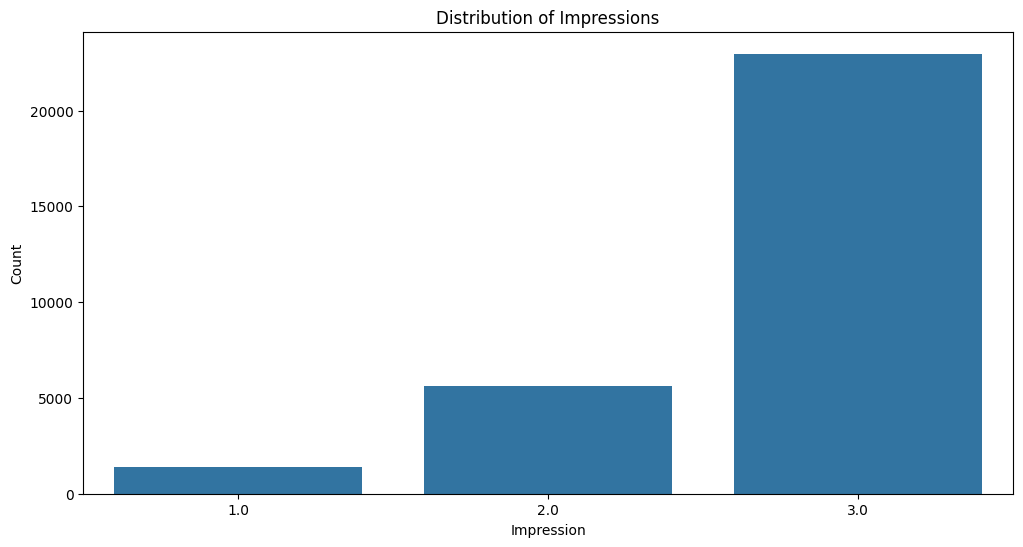

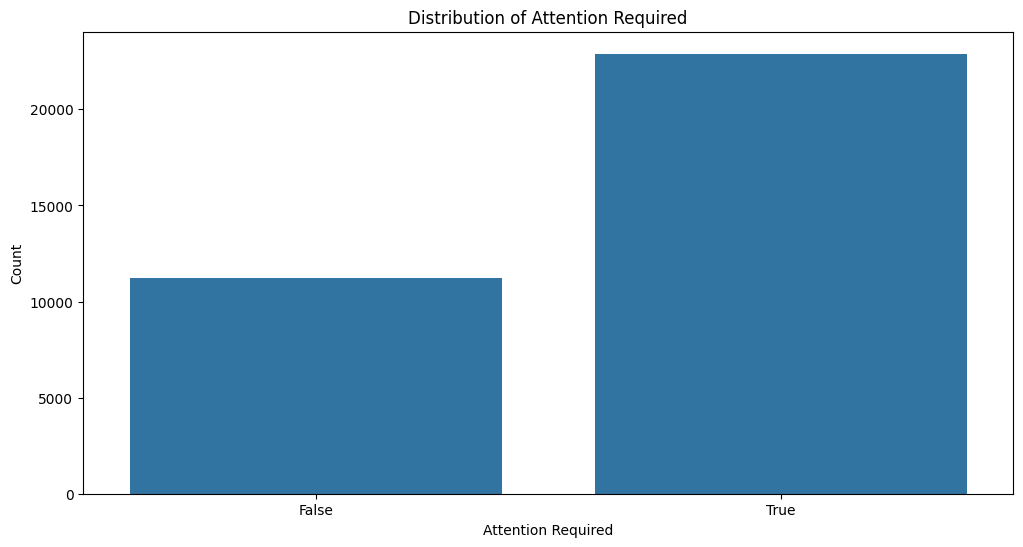

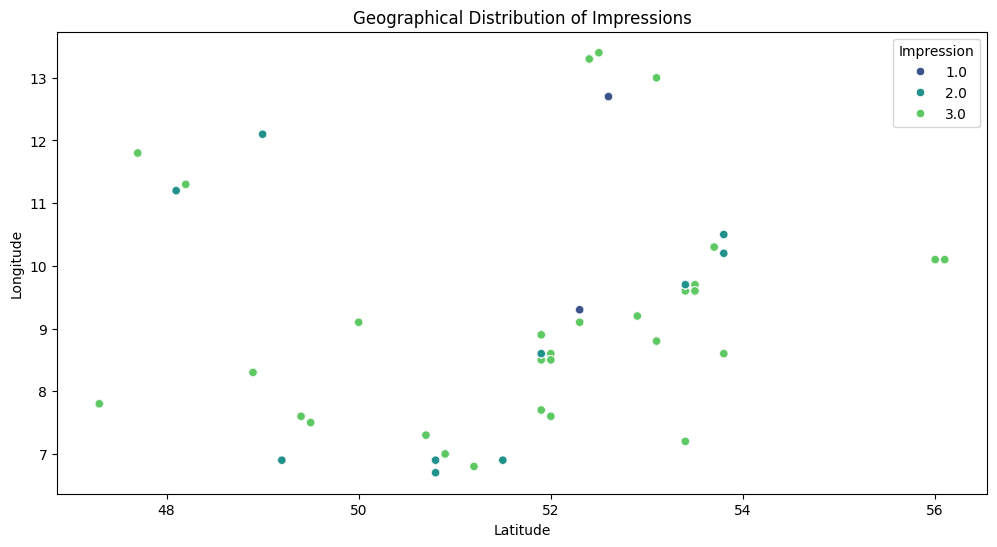

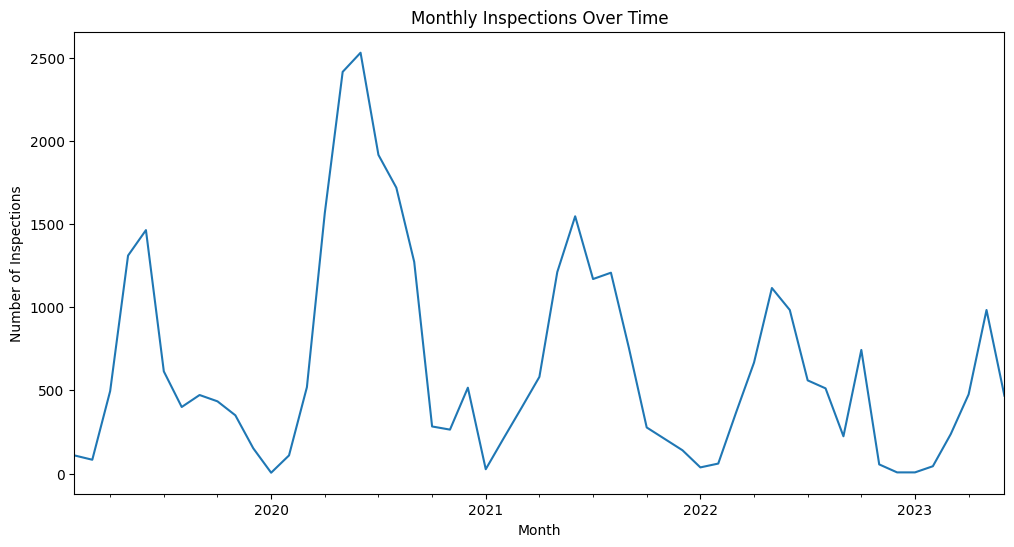

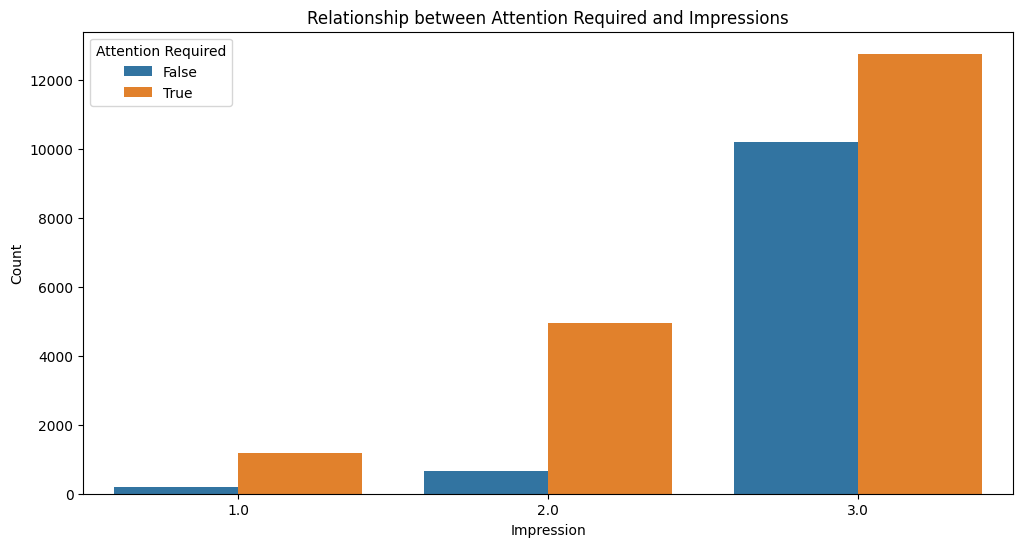

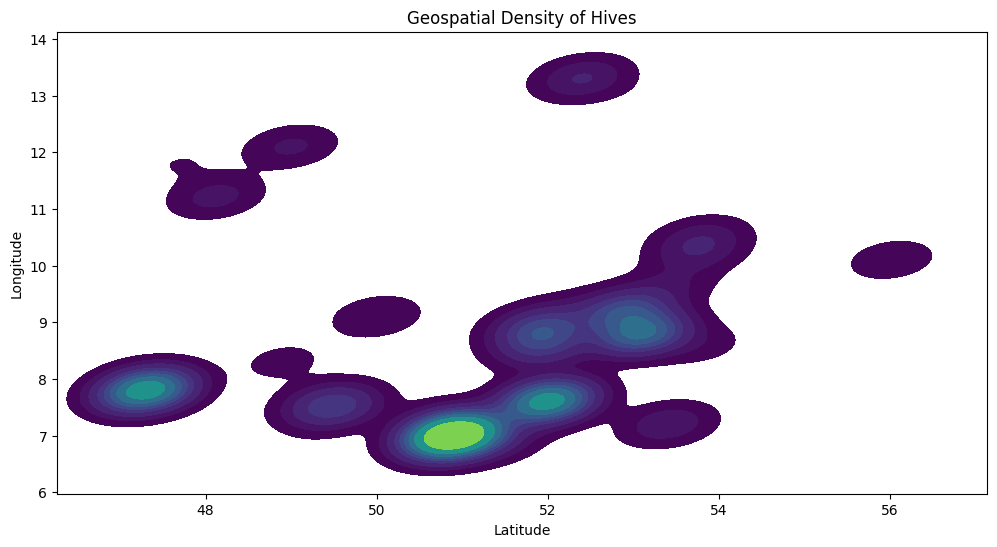


Cleaned data saved to cleaned_data.csv


In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data
file_path = '/content/drive/MyDrive/bob_publication_data/inspections/inspections.csv'
data = pd.read_csv(file_path)

# Inspect the data
print("First few rows of the dataset:")
print(data.head())

print("\nColumn names and data types:")
print(data.dtypes)

print("\nSummary statistics:")
print(data.describe(include='all'))

# Handle missing values
print("\nMissing values in each column:")
print(data.isnull().sum())

# Convert data types
data['created_at'] = pd.to_datetime(data['created_at'], errors='coerce')
data['deleted_at'] = pd.to_datetime(data['deleted_at'], errors='coerce')

# Convert 'attention' to boolean
data['attention'] = data['attention'].astype(bool)

# Convert categorical columns to category type if necessary
categorical_columns = ['impression', 'category_id', 'category_type', 'hive_type', 'translation', 'hive_id', 'key']
for col in categorical_columns:
    data[col] = data[col].astype('category')

print("\nData types after conversion:")
print(data.dtypes)

# Visualizations

# 1. Distribution of Impressions
plt.figure(figsize=(12, 6))
sns.countplot(data=data, x='impression')
plt.title('Distribution of Impressions')
plt.xlabel('Impression')
plt.ylabel('Count')
plt.show()

# 2. Distribution of Attention Required
plt.figure(figsize=(12, 6))
sns.countplot(data=data, x='attention')
plt.title('Distribution of Attention Required')
plt.xlabel('Attention Required')
plt.ylabel('Count')
plt.show()

# 3. Geographical Distribution of Impressions
plt.figure(figsize=(12, 6))
sns.scatterplot(data=data, x='coordinate_lat', y='coordinate_lon', hue='impression', palette='viridis')
plt.title('Geographical Distribution of Impressions')
plt.xlabel('Latitude')
plt.ylabel('Longitude')
plt.legend(title='Impression')
plt.show()

# 4. Time Series Analysis: Inspections over time
data['inspection_month'] = data['created_at'].dt.to_period('M')
monthly_inspections = data.groupby('inspection_month').size()
plt.figure(figsize=(12, 6))
monthly_inspections.plot()
plt.title('Monthly Inspections Over Time')
plt.xlabel('Month')
plt.ylabel('Number of Inspections')
plt.show()



# 6. Relationship between Attention Required and Impressions
plt.figure(figsize=(12, 6))
sns.countplot(data=data, x='impression', hue='attention')
plt.title('Relationship between Attention Required and Impressions')
plt.xlabel('Impression')
plt.ylabel('Count')
plt.legend(title='Attention Required')
plt.show()

# 7. Geospatial Density Plot
plt.figure(figsize=(12, 6))
sns.kdeplot(data=data, x='coordinate_lat', y='coordinate_lon', fill=True, cmap='viridis')
plt.title('Geospatial Density of Hives')
plt.xlabel('Latitude')
plt.ylabel('Longitude')
plt.show()

# Save the cleaned data for further processing
cleaned_file_path = 'cleaned_data.csv'
data.to_csv(cleaned_file_path, index=False)
print(f"\nCleaned data saved to {cleaned_file_path}")
